# Setup

In [61]:
# import your standard packages
%run ../../../global_tools/start.py

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [62]:
path = '/home/jennap/projects/LRGROUP/shared_data/'
infn = 'Hypoxic_Eutrophic_Locations_Breitburg2018/hypoxic_eutrophic_2018_sites.xlsx'

outfn = '../../data/breitburg_processed.nc'

lat_bounds = [-1.5, 33]
lon_bounds = [48.5, 102.5]

# Get Data

In [63]:
df = pd.read_excel(path + infn)
df

,Country,System,Lat,Long,Decade,Hypoxia Current,Classification,Benthic,Fisheries,Comment,References
0,Albania/Montenegro,Southeastern Adriatic,41.567378,19.389356,2010.0,NaN,Eutrophic,NaN,NaN,The southeastern Adriatic strip is strongly in...,"Marini et al, 2010;"
1,Angola,Baía de Luanda,-8.804976,13.234019,2010.0,NaN,Hypoxic,NaN,NaN,NaN,"Nicolau, Suzana João da Conceição 2016. Caract..."
2,Antarctica,McMurdo Sound,-77.850000,166.651000,1990.0,Improved,Improved,"Abundance reduced by 1/3, diversity high or hi...",NaN,"McMurdo Station, a U.S. Antarctic research cen...","Conlan et al. 2004, Conlan et al. 2010, Kim et..."
3,Antigua & Barbuda,Sand-mining dock-South Barbuda,17.116670,-61.700000,1990.0,NaN,Eutrophic,NaN,NaN,Antigua and Barbuda is a twin-island nation lo...,"Bernal et al. 2004, Goreau & Goreau 1996"
4,Argentina,Mar del Plata,-38.025776,-57.522922,2010.0,NaN,Eutrophic,NaN,NaN,The intertidal zone around sewage discharges o...,Garaffo et al 2012
5,Argentina,Nuevo Gulf (Nueva Bay),-42.765004,-65.029430,2000.0,NaN,Hypoxic,Research using macrobenthos as indicators of p...,NaN,Gulfo Nuevo is a semi-enclosed body of water f...,"Diaz et al, 2002; Piriz et al 2003; Torres and..."
6,Argentina,Rio de la La Plata estuary,-35.000000,-57.000000,1980.0,Periodic,Hypoxic,NaN,NaN,The Rio de la Plata (La Plata River) Estuary i...,Nagy et al. 2002
7,Australia,Lake Macquarie,-38.087083,151.572128,1980.0,Unknown,improved,NaN,NaN,Lake Macquarie is Australia's largest coastal ...,NaN
8,Australia,Port Hacking Estuary,-34.067000,151.108000,1980.0,Seasonal,Hypoxic,Lower benthic secondary production,NaN,Port Hacking is an estuary located 23 kilomete...,Rainer & Fitzhardinge 1981
9,Australia,Great Barrier Reef,-19.103797,148.526911,2000.0,NaN,Eutrophic,NaN,NaN,The GBR located in Australia’s northeastern co...,"Furnas et al, 2005; Prange et al 2009;"


In [64]:
# subset for Indian Ocean

df = df[(df['Long ']>lon_bounds[0]) & (df['Long ']<lon_bounds[1]) & (df['Lat ']>lat_bounds[0])& (df['Lat ']<lat_bounds[1])]

# add new column with numeric classifications
df['Numeric_Classification'] = [1 if x =='Hypoxic' else 0 for x in df['Classification ']] 

df

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,System,Lat,Long,Decade,Hypoxia Current,Classification,Benthic,Fisheries,Comment,References,Numeric_Classification
55,Bangladesh,Ganges,21.713200,87.980892,1980.0,Unknown,Hypoxic,NaN,NaN,"The Ganges River flows through China, India, N...",Maybeck & Helmer 1989,1
235,India,Chilika Lagoon,19.737222,85.299722,2000.0,NaN,Eutrophic,NaN,Fisheries resources in the lagoon have been re...,Chilika Lagoon is the largest brackish lagoon ...,"Jayaraman et al, 2005; Panigrahi et al, 2007;",0
236,India,Cochin Backwaters,9.978947,76.266489,2000.0,Seasonal,Hypoxic,Macrobenthos reduced and presence of opportuni...,Fish-kill events have been reported within the...,Vembanab Lake is a micro-tidal estuary receivi...,"Martin et al, 2009, 2010",1
237,India,Cuvum River,13.066667,80.283333,2000.0,NaN,Hypoxic,NaN,NaN,NaN,Shanmugam et al. 2007,1
238,India,Dharamtar creek,18.793291,72.974468,2010.0,NaN,Hypoxic,NaN,NaN,Heated discharge from power plant adversely im...,Kulkarni et al. 2011,1
239,India,Kadinamkulam Backwaters,8.617000,76.823000,1990.0,Seasonal,Hypoxic,"Mass Mortality, reduced species richness",NaN,Kadinamkulam Backwaters are adjacent to the co...,Nandan & Azis 1995,1
240,India,Kerala Coast,10.394500,76.021583,2010.0,NaN,Hypoxic,NaN,Crab jubilee associated with red tide of Nocti...,The discharge of untreated sewage and other or...,Padmakumar et al. 2016,1
241,India,Mahanadi River,20.323349,86.672994,1980.0,NaN,Eutrophic,NaN,NaN,The tropical river Mahanadi River in Northeast...,Dey et al. 2013,0
242,India,Malad Creek,19.150000,72.800000,2000.0,NaN,Hypoxic,NaN,NaN,NaN,Vijay et al. 2010,1
243,India,Mandovi and Zuari Rivers,15.442295,73.794522,1980.0,NaN,Hypoxic,NaN,NaN,NaN,Sousa & Gupta 1986,1


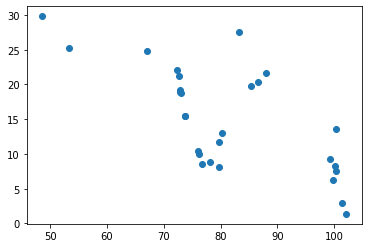

In [65]:
plt.scatter(df['Long '],df['Lat '])

In [66]:
df = df.drop(labels=[519,648,253,472,473,474,475], axis=0) 

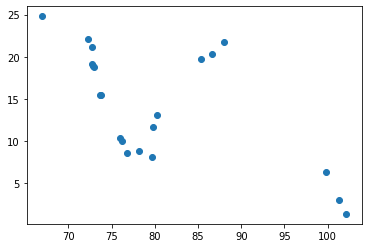

In [67]:
plt.scatter(df['Long '],df['Lat '])

In [68]:
lat = df['Lat ']
lon = df['Long ']
etype = df['Numeric_Classification']
decade = df['Decade ']


In [69]:
# convert to xarray dataset
ds=xr.Dataset()

# add variables to dataset

ds["etype"]=xr.DataArray(etype,dims = ['decade'],
                     coords =[decade])

ds["lat"]=xr.DataArray(lat,dims = ['decade'],
                     coords =[decade])
ds["lon"]=xr.DataArray(lon,dims = ['decade'],
                     coords =[decade])


# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds.to_netcdf(outfn,mode='w',format = "NETCDF4")
ds

<xarray.Dataset>
Dimensions:  (decade: 21)
Coordinates:
  * decade   (decade) float64 1.98e+03 2e+03 2e+03 ... 2e+03 1.98e+03 1.99e+03
Data variables:
    etype    (decade) int64 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
    lat      (decade) float64 21.71 19.74 9.979 13.07 ... 3.006 24.79 8.163
    lon      (decade) float64 87.98 85.3 76.27 80.28 ... 99.84 101.3 66.99 79.73